# 5.1 - Image-text-to-text

<br>
<br>

<img src="https://raw.githubusercontent.com/Hack-io-AI/ai_images/main/multi1.webp" style="width:400px;"/>


<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1---Modelos-multimodales-Image-text-to-text" data-toc-modified-id="1---Modelos-multimodales-Image-text-to-text-1">1 - Modelos multimodales Image-text-to-text</a></span></li><li><span><a href="#2---Uso-del-modelo" data-toc-modified-id="2---Uso-del-modelo-2">2 - Uso del modelo</a></span><ul class="toc-item"><li><span><a href="#2.1---Procesador" data-toc-modified-id="2.1---Procesador-2.1">2.1 - Procesador</a></span></li><li><span><a href="#2.2---Modelo-multimodal" data-toc-modified-id="2.2---Modelo-multimodal-2.2">2.2 - Modelo multimodal</a></span></li></ul></li></ul></div>

## 1 - Modelos multimodales Image-text-to-text

Los modelos multimodales Image-text-to-text son una clase de IA que combina el procesamiento de imágenes y texto para generar resultados textuales basados en entradas visuales y textuales. Estos modelos son capaces de interpretar imágenes y texto simultáneamente, lo que les permite generar respuestas, descripciones o incluso continuar conversaciones a partir de datos visuales y lingüísticos. 


**Funcionamiento**:

1. **Entrada combinada de imagen y texto**: El modelo recibe una imagen y texto como entrada, ya sean preguntas, indicaciones o comentarios sobre la imagen.


2. **Procesamiento de imagen**: La imagen es procesada por una parte del modelo que actúa como un "codificador visual", generalmente basado en redes neuronales convolucionales (CNN) o modelos como Vision Transformers (ViT). Este codificador extrae características clave de la imagen.


3. **Procesamiento de texto**: El texto es procesado por una red basada en lenguaje natural, similar a los modelos de lenguaje como GPT, que convierten el texto en representaciones internas.


4. **Fusión multimodal**: Las representaciones de la imagen y el texto se combinan, típicamente en un espacio compartido donde ambos tipos de datos se relacionan y se contextualizan mutuamente.


5. **Generación de texto**: A partir de esa combinación de información, el modelo genera una respuesta en forma de texto, como una descripción, una interpretación de la imagen, o una respuesta a la pregunta hecha sobre la imagen.


<br>

**Características clave**:

+ **Comprensión contextual**: Los modelos multimodales no solo "ven" una imagen o "leen" texto, sino que comprenden el contexto y las relaciones entre ambos tipos de datos.

+ **Capacidad de razonamiento**: Pueden generar respuestas que implican un análisis profundo de lo que se muestra en la imagen combinado con lo que se les pregunta o comenta en el texto.

+ **Entrenamiento con grandes cantidades de datos**: Estos modelos se entrenan utilizando grandes conjuntos de datos que contienen imágenes emparejadas con descripciones textuales o interacciones textuales, lo que les permite aprender correspondencias entre el contenido visual y el lingüístico.


<br>


**Ejemplos de usos**:

1. **Generación de descripciones de imágenes**: El modelo puede generar descripciones detalladas de imágenes para personas con discapacidad visual o para mejorar la accesibilidad en plataformas digitales.


2. **Respuesta a preguntas sobre imágenes (VQA - Visual Question Answering)**: Al recibir una imagen y una pregunta relacionada con ella, el modelo puede generar una respuesta contextualizada y precisa.


3. **Explicaciones textuales en sistemas de educación o e-learning**: Para ayudar a los estudiantes a comprender conceptos complejos a través de combinaciones de imágenes y explicaciones textuales.


4. **Análisis de escenas**: En aplicaciones como la robótica, donde el robot puede analizar una escena visual y recibir instrucciones basadas en texto para ejecutar acciones.

## 2 - Uso del modelo 

Vamos a usar el modelo [tiny-random-idefics](https://huggingface.co/HuggingFaceM4/tiny-random-idefics) para hacer pruebas basado en [idefics2](https://huggingface.co/HuggingFaceM4/idefics2-8b), un modelo multimodal abierto que acepta secuencias arbitrarias de entradas de imágenes y texto, y produce salidas en texto. El modelo puede responder preguntas sobre imágenes, describir contenido visual, crear historias basadas en múltiples imágenes o simplemente funcionar como un modelo de lenguaje puro sin entradas visuales. Mejora respecto a [idefics1](https://huggingface.co/HuggingFaceM4/idefics-80b-instruct), incrementando significativamente las capacidades relacionadas con OCR, comprensión de documentos y razonamiento visual.

In [1]:
# importamos desde la librería transformers AutoProcessor y AutoModelForPreTraining

from transformers import AutoProcessor, AutoModelForPreTraining

In [2]:
# definimos el modelo

modelo = 'HuggingFaceM4/tiny-random-idefics'

### 2.1 - Procesador

In [3]:
# definicion del procesador

procesador = AutoProcessor.from_pretrained(modelo)

In [4]:
# descripcion del objeto

procesador

IdeficsProcessor:
- image_processor: IdeficsImageProcessor {
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_num_channels": 3,
  "image_processor_type": "IdeficsImageProcessor",
  "image_size": 30,
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "IdeficsProcessor"
}

- tokenizer: LlamaTokenizerFast(name_or_path='HuggingFaceM4/tiny-random-idefics', vocab_size=32000, model_max_length=2048, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<unk>', 'additional_special_tokens': ['<image>', '<fake_token_around_image>']}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, 

1. **image_processor (Procesador de imágenes)**

El procesador de imágenes, en este caso, es un componente que toma imágenes como entrada y las prepara para su uso en un modelo de aprendizaje profundo. Las configuraciones aquí especifican cómo se deben ajustar o normalizar las imágenes antes de que el modelo las procese.

+ **image_mean**: [0.48145466, 0.4578275, 0.40821073] — Estos valores representan los promedios (media) de los tres canales de color (rojo, verde y azul) para la normalización de imágenes. Esto significa que el modelo ajustará los valores de los píxeles de la imagen restando estos promedios.

+ **image_num_channels**: 3 — El número de canales de color en las imágenes procesadas. Aquí son tres, lo que corresponde a una imagen RGB (rojo, verde, azul).

+ **image_processor_type**: "IdeficsImageProcessor" — Es el tipo de procesador de imágenes que se utiliza, en este caso, uno diseñado específicamente para el modelo Idefics.

+ **image_size**: 30 — El tamaño al que se ajusta la imagen. Parece indicar que la imagen se redimensiona a 30 píxeles de ancho y alto, lo que podría ser parte de un preprocesamiento básico para simplificar la entrada al modelo.

+ **image_std**: [0.26862954, 0.26130258, 0.27577711] — Estos valores representan las desviaciones estándar de los tres canales de color. La normalización se realiza dividiendo los valores de los píxeles por estos números después de haber restado las medias correspondientes, para que los datos entren en un rango estándar que sea manejable por el modelo.

+ **processor_class**: "IdeficsProcessor" — Especifica la clase general que controla este procesamiento de imágenes, que en este caso es IdeficsProcessor.

<br>

2. **tokenizer (Tokenizador)**

El tokenizador se encarga de dividir el texto en tokens, es decir, unidades más pequeñas de información que el modelo puede procesar. En este caso, el tokenizador es LlamaTokenizerFast, una versión rápida y optimizada del tokenizador estándar.

+ **name_or_path**: 'HuggingFaceM4/tiny-random-idefics' — El nombre del modelo o el camino donde se encuentra. En este caso, hace referencia a un modelo llamado tiny-random-idefics en Hugging Face.

+ **vocab_size**: 32000 — Tamaño del vocabulario del tokenizador. Es decir, puede procesar hasta 32,000 tokens únicos.

+ **model_max_length**: 2048 — La longitud máxima de la secuencia de tokens que el modelo puede manejar. En este caso, hasta 2048 tokens.

+ **is_fast**: true — Indica que este tokenizador es una versión rápida, lo que significa que está optimizado para procesar grandes volúmenes de texto de manera más eficiente.

+ **padding_side**: 'left' — Indica que cuando se agregue padding (relleno) a las secuencias para hacerlas de la misma longitud, el relleno se agregará en el lado izquierdo.

+ **truncation_side**: 'right' — Indica que si el texto es demasiado largo, se truncará (cortará) del lado derecho.

+ **special_tokens**:

    + bos_token (`<s>`) — Token especial para marcar el inicio de una secuencia.
    + eos_token (`</s>`) — Token especial para marcar el final de una secuencia.
    + unk_token (`<unk>`) — Token especial para palabras o símbolos desconocidos (que no están en el vocabulario del modelo).
    + pad_token (`<unk>`) — Usado como token de padding (relleno).

+ **additional_special_tokens**:

    + `<image>` — Un token especial que representa la presencia de una imagen en la secuencia de texto.
    + `<fake_token_around_image>` — Un token adicional que probablemente ayuda a estructurar las secuencias alrededor de las imágenes.

+ **added_tokens_decoder: Aquí se definen cómo se manejan y decodifican los tokens adicionales:

    + 0: `<unk>` — Token desconocido.
    + 1: `<s>` — Token de inicio de secuencia.
    + 2: `</s>` — Token de final de secuencia.
    + 32000: `<fake_token_around_image>` — Token especial alrededor de imágenes.
    + 32001: `<image>` — Token para imágenes.
    
<br>
    
3. **processor_class (Clase procesadora)**

+ **processor_class**: "IdeficsProcessor" — La clase que engloba todo el procesamiento descrito anteriormente, incluyendo tanto el procesamiento de imágenes como el tokenizador.


Ahora vamos a definir la imagen y el prompt que le pasamos al modelo.

In [5]:
# imagen

from PIL import Image
import requests as req


url_img = 'https://upload.wikimedia.org/wikipedia/commons/8/86/Id%C3%A9fix.JPG'

respuesta = req.get(url=url_img, stream=True).raw

imagen = Image.open(fp=respuesta)

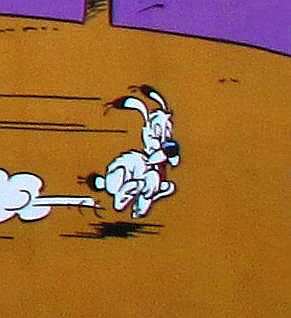

In [6]:
imagen

In [7]:
# texto 

texto = 'In this picture from Asterix and Obelix, we can see'

In [8]:
# definimos el prompt con la imagen y el texto, pueden ser varios

prompts = [[url_img, texto],]

In [9]:
# tensor de salida del procesador

tensor = procesador(prompts, return_tensors='pt').to('cpu')

In [12]:
tensor.input_ids.shape

torch.Size([1, 19])

### 2.2 - Modelo multimodal

In [13]:
# definicion del modelo

modelo_multi = AutoModelForPreTraining.from_pretrained(modelo)  

/opt/anaconda3/envs/ia/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [14]:
# descripcion del modelo

modelo_multi

IdeficsForVisionText2Text(
  (model): IdeficsModel(
    (embed_tokens): IdeficsDecoupledEmbedding(
      num_embeddings=32000, num_additional_embeddings=2, embedding_dim=16, partially_freeze=False
      (additional_embedding): Embedding(2, 16)
    )
    (vision_model): IdeficsVisionTransformer(
      (embeddings): IdeficsVisionEmbeddings(
        (patch_embedding): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2), bias=False)
        (position_embedding): Embedding(226, 32)
      )
      (pre_layrnorm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
      (encoder): IdeficsVisionEncoder(
        (layers): ModuleList(
          (0-4): 5 x IdeficsVisionEncoderLayer(
            (self_attn): IdeficsVisionAttention(
              (k_proj): Linear(in_features=32, out_features=32, bias=True)
              (v_proj): Linear(in_features=32, out_features=32, bias=True)
              (q_proj): Linear(in_features=32, out_features=32, bias=True)
              (out_proj): Linear(in_features=32,

1. **IdeficsModel**

Este es el núcleo del modelo que maneja las entradas de texto y visión. Tiene varias subpartes para manejar diferentes tareas.

2. **Embed Tokens**

Este componente es responsable de convertir las entradas de texto en representaciones internas (embeddings) que el modelo pueda entender.

3. **Vision Model**

Esta parte maneja el procesamiento de imágenes. Se basa en un Vision Transformer (ViT) modificado.

4. **Perceiver Resampler** (IdeficsPerceiverResampler)

Este componente ajusta la representación de la imagen para que sea más manejable por el modelo. Utiliza varias capas de atención y redes de percepción multicapa (MLP) para reducir la complejidad de la información visual, manteniendo los aspectos importantes.

5. **Decoder Layers**

Estas capas manejan la decodificación del texto. Aquí el modelo genera texto a partir de la información extraída de la imagen y el contexto textual.

6. **Gated Cross Attention Layers**

Estas capas permiten la interacción entre la información visual y textual. Es decir, permiten que el modelo "vea" cómo la imagen influye en la generación del texto, y viceversa.

7. **Norm Layers**

Se utilizan capas de normalización IdeficsRMSNorm para estabilizar las representaciones internas, lo que ayuda a mejorar la eficiencia y la estabilidad del modelo.

8. **Language Model Head**

La parte final del modelo que convierte las representaciones internas en palabras.
